In [ ]:
import nltk
nltk.download('punkt_tab')
import spacy

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
reviews = [
  "Absolutely LOVED this product!!! Will buy again 😊 Visit http://shop.example.com",
  "Worst purchase ever... arrived broken, no response from support @helpdesk",
  "Ok quality; does the job. 5/5 stars! #satisfied",
  "Email me at user@example.org for details about bulk order!!!",
  "Super overpriced!! Paid $299 but performance is meh...",
  "<div>Great build quality</div><p>But shipping was slow</p>",
  "Contact: +44 20 7946 0958 or (020)79460958",
  "MixedCASE and random123numbers and symbols %^&*",
  "Line1\nLine2\tTabbed text\r\nEnd of review",
  "Contractions—can't, won't, shouldn't—are common here."
]

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)         # Remove emails
    text = re.sub(r'<.*?>', '', text)           # Remove HTML tags
    text = re.sub(r'\(?\+?\d{1,3}[\s\-]?\(?\d+\)?[\s\-]?\d+\)?', '', text)  # Remove phone numbers
    text = re.sub(r'[@#]\w+', '', text)         # Remove mentions/hashtags
    text = re.sub(r"[^\w\s']", ' ', text)       # Keep apostrophes and alphanumeric
    text = re.sub(r'\s+', ' ', text).strip()    # Normalize whitespace
    return text.lower()

In [ ]:
cleaned_reviews = [clean_text(review) for review in reviews]
cleaned_reviews[:3]

['absolutely loved this product will buy again visit',
 'worst purchase ever arrived broken no response from support',
 'ok quality does the job 5 5 stars']

In [ ]:
from nltk.tokenize import word_tokenize
import spacy
import re

sample = cleaned_reviews[0]
print("Sample Review:", sample)

# 1. Simple split()
split_tokens = sample.split()
print("\nSplit Tokens:", split_tokens)

# 2. NLTK word_tokenize
nltk_tokens = word_tokenize(sample)
print("\nNLTK Tokens:", nltk_tokens)

# 3. spaCy
nlp = spacy.load("en_core_web_sm")
spacy_tokens = [token.text for token in nlp(sample)]
print("\nspaCy Tokens:", spacy_tokens)

# 4. Bonus: Regex Tokenization
regex_tokens = re.findall(r"\b\w[\w']*\b", sample)
print("\nRegex Tokens:", regex_tokens)

Sample Review: absolutely loved this product will buy again visit

Split Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']

NLTK Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']

spaCy Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']

Regex Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


In [ ]:
from collections import Counter

# Use regex tokenization across all cleaned reviews
all_tokens = []
for review in cleaned_reviews:
    tokens = re.findall(r"\b\w[\w']*\b", review)
    all_tokens.extend(tokens)

# Compute frequency
token_freq = Counter(all_tokens)
top_10 = token_freq.most_common(10)
print(top_10)

[('5', 2), ('and', 2), ('absolutely', 1), ('loved', 1), ('this', 1), ('product', 1), ('will', 1), ('buy', 1), ('again', 1), ('visit', 1)]


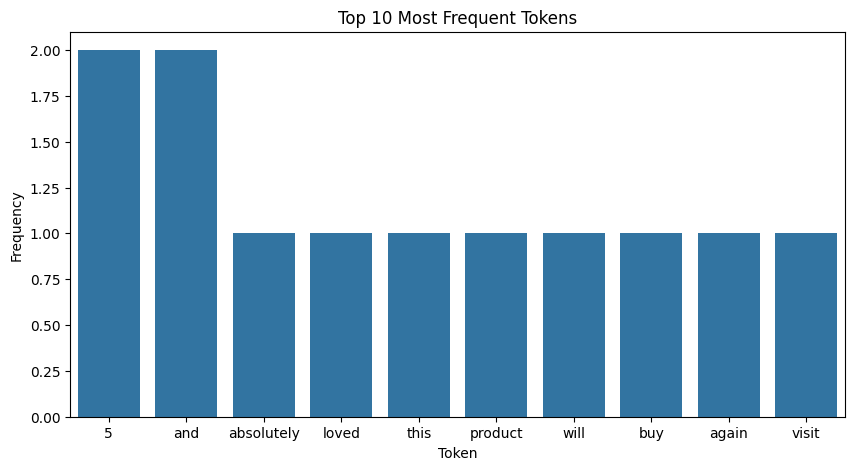

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tokens, freqs = zip(*top_10)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(tokens), y=list(freqs))
plt.title("Top 10 Most Frequent Tokens")
plt.ylabel("Frequency")
plt.xlabel("Token")
plt.show()

Tokenization Differences
split(): Fails to separate punctuation or handle contractions.

nltk.word_tokenize(): Handles punctuation and contractions fairly well.

spaCy: Most sophisticated, considers linguistic context.

Regex: Good balance between control and accuracy (useful for simple pipelines).

Top Tokens Analysis
You may see tokens like:

"the", "and": common stopwords.

"product", "quality", "buy": frequent in customer reviews.

"can’t", "won’t": contractions may appear often if not split properly.

Surprising Tokens?
If 'meh' or 'ok' appear, it's an indicator of neutral or slightly negative sentiment.